### Cross Validation 
<hr>


<p align=center>
<img src="https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width="60%"></p>

<br>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.model_selection import ShuffleSplit

%matplotlib inline 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.drop('Unnamed: 32', axis=1, inplace=True)

In [4]:
X = data.drop('diagnosis', axis=1)
y= data['diagnosis']

# Enconding 
label = LabelEncoder()
y = label.fit_transform(y)

# Normalização 
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=14)

In [5]:
# Regressão logística 
mdl = LogisticRegression(random_state=14, class_weight='balanced')
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



<br>
<br>
<hr>
<hr>
<br>
<hr>

### Cross Val Score 
<hr>

Cross_val_score pode englobar qualquer função de Folds, é útil para testar diferentes técnicas e abordagens sobre a validação cruzada. 

In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
# Cross validation 
score = cross_val_score(mdl, X,y, cv=5, scoring='precision')

In [8]:
# Possibilidade de usar dentro do Cross_val_score 
# KFold 
# StratifiedKFold 
# ShuffleSplit 

score = cross_val_score(mdl, X,y, cv=ShuffleSplit(n_splits=5, test_size=0.30, random_state=14), scoring='precision')

In [9]:
# lista de modelos 
score

array([0.98305085, 0.98550725, 0.92982456, 0.95652174, 0.98113208])

In [10]:
# Média 
score.mean()

0.967207293968016

<br>
<hr>
<hr>
<br>

### K-Fold 
<hr>

In [11]:
from sklearn.model_selection import KFold

In [12]:
# Definindo folds 
kf = KFold(5, shuffle=True, random_state=14)

resultados = []

for linhas_treino, linhas_teste in kf.split(X):
    print('Treino: ', linhas_treino.shape[0])
    print('Test: ', linhas_teste.shape[0])
    
    X_treino, X_teste = X[linhas_treino], X[linhas_teste]
    y_treino, y_teste = y[linhas_treino], y[linhas_teste]
    
    mdl = LogisticRegression(random_state=14, class_weight='balanced')
    mdl.fit(X_treino, y_treino)
    y_pred = mdl.predict(X_teste)
    
    # Precision 
    metric = precision_score(y_teste, y_pred)
    resultados.append(metric)
    print('Precision: ', metric)
    print()

Treino:  455
Test:  114
Precision:  0.9743589743589743

Treino:  455
Test:  114
Precision:  0.9545454545454546

Treino:  455
Test:  114
Precision:  0.9767441860465116

Treino:  455
Test:  114
Precision:  0.9523809523809523

Treino:  456
Test:  113
Precision:  0.9761904761904762



In [13]:
# Metrics em cada fold 
resultados

[0.9743589743589743,
 0.9545454545454546,
 0.9767441860465116,
 0.9523809523809523,
 0.9761904761904762]

In [14]:
# média e desvio padrão
np.mean(resultados), np.std(resultados)

(0.9668440087044738, 0.010975236738027146)

<hr>
<br>
<hr>
<hr>

### Repetição de KFolds 
<br>
Validação Alterando a <b> Seed </b> do random_state 

In [15]:
resultados = []
for seed in range(3):
    print('Seed: ', seed)
    kf = KFold(5, shuffle=True, random_state=seed)
    for linhas_treino, linhas_teste in kf.split(X):
        print('Treino: ', linhas_treino.shape[0])
        print('Test: ', linhas_teste.shape[0])

        X_treino, X_teste = X[linhas_treino], X[linhas_teste]
        y_treino, y_teste = y[linhas_treino], y[linhas_teste]

        mdl = LogisticRegression(random_state=14, class_weight='balanced')
        mdl.fit(X_treino, y_treino)
        y_pred = mdl.predict(X_teste)

        # Acurácia 
        acc = accuracy_score(y_teste, y_pred)
        resultados.append(acc)
        print('Acurácia: ', acc)
        print()

Seed:  0
Treino:  455
Test:  114
Acurácia:  0.9736842105263158

Treino:  455
Test:  114
Acurácia:  0.9649122807017544

Treino:  455
Test:  114
Acurácia:  0.9473684210526315

Treino:  455
Test:  114
Acurácia:  0.9824561403508771

Treino:  456
Test:  113
Acurácia:  0.9823008849557522

Seed:  1
Treino:  455
Test:  114
Acurácia:  0.9649122807017544

Treino:  455
Test:  114
Acurácia:  0.956140350877193

Treino:  455
Test:  114
Acurácia:  0.9473684210526315

Treino:  455
Test:  114
Acurácia:  0.9912280701754386

Treino:  456
Test:  113
Acurácia:  0.9823008849557522

Seed:  2
Treino:  455
Test:  114
Acurácia:  0.9473684210526315

Treino:  455
Test:  114
Acurácia:  0.9736842105263158

Treino:  455
Test:  114
Acurácia:  0.9912280701754386

Treino:  455
Test:  114
Acurácia:  0.9824561403508771

Treino:  456
Test:  113
Acurácia:  0.9734513274336283



In [16]:
np.mean(resultados)

0.9707240076592659

In [17]:
np.std(resultados)

0.01489030276878573

<br>
<br>
<br>
<hr>
<hr>
<br>

### StratifiedKFold 
<hr>

StratifiedKFold Mantém a proporção das classes na hora da validação cruzada, diferentemente do KFold e do ShuffleSplit.

<b> Deve especificar o Y contendo as classes para a estratificação </b> 
<br>

In [18]:
from sklearn.model_selection import StratifiedKFold

In [19]:
sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=14)

resultados = []

for treino, teste in sk.split(X,y):
    print('Treino:', treino.shape[0])
    print('Teste:', teste.shape[0])
    
    X_treino, X_teste = X[treino], X[teste]
    y_treino, y_teste = y[treino], y[teste]
    
    mdl = LogisticRegression(random_state=14, class_weight='balanced')
    mdl.fit(X_treino, y_treino)
    y_pred = mdl.predict(X_teste)

    # Precision
    metric = precision_score(y_teste, y_pred)
    resultados.append(metric)
    print('Precision:', metric)
    print()

Treino: 455
Teste: 114
Precision: 1.0

Treino: 455
Teste: 114
Precision: 0.9767441860465116

Treino: 455
Teste: 114
Precision: 0.975609756097561

Treino: 455
Teste: 114
Precision: 0.9761904761904762

Treino: 456
Teste: 113
Precision: 0.9523809523809523



In [20]:
np.mean(resultados)

0.9761850741431003

<br>
<br>
<br>
<hr>
<hr>
<br>

### ShuffleSplit
<hr>

Gera índices para dividir dados em conjuntos de treinamento e teste.

Nota: ao contrário de outras estratégias de validação cruzada, as divisões aleatórias não garantem que todas as dobras sejam diferentes, embora isso ainda seja muito provável para conjuntos de dados consideráveis.

Com ShuffleSplit eu consigo definir a porcentagem de dados que vou utilizar no treino e no teste 

In [21]:
from sklearn.model_selection import ShuffleSplit 

In [22]:
sf = ShuffleSplit(n_splits=5, test_size=0.30, random_state=10)

resultados = []
count = 0

for treino, teste in sf.split(X):
    count = count + 1 
    print('Fold:', count)
    print('Treino:', treino.shape[0])
    print('Teste:', teste.shape[0])
    
    X_treino, X_teste = X[treino], X[teste]
    y_treino, y_teste = y[treino], y[teste]
    
    mdl = LogisticRegression(random_state=14, class_weight='balanced')
    mdl.fit(X_treino, y_treino)
    y_pred = mdl.predict(X_teste)

    # Precision
    metric = precision_score(y_teste, y_pred)
    resultados.append(metric)
    print('Precision:', metric)
    print()

Fold: 1
Treino: 398
Teste: 171
Precision: 0.9516129032258065

Fold: 2
Treino: 398
Teste: 171
Precision: 0.9298245614035088

Fold: 3
Treino: 398
Teste: 171
Precision: 0.9672131147540983

Fold: 4
Treino: 398
Teste: 171
Precision: 0.9827586206896551

Fold: 5
Treino: 398
Teste: 171
Precision: 1.0



In [23]:
resultados

[0.9516129032258065,
 0.9298245614035088,
 0.9672131147540983,
 0.9827586206896551,
 1.0]

In [24]:
np.mean(resultados)

0.9662818400146136

<br>
<br>
<br>
<hr>
<hr>
<br>

### Cross Validate 
<hr>
O cross validate apresenta uma diferença do cross_val_score, ele permite inferir duas ou mais métricas para avaliar o modelo. 

In [25]:
from sklearn.model_selection import cross_validate

In [26]:
metrics = ['accuracy', 'precision']

score = cross_validate(mdl, X,y, cv=5, scoring=metrics)

In [27]:
score

{'fit_time': array([0.01099896, 0.01199746, 0.01399851, 0.01599789, 0.01199794]),
 'score_time': array([0.00399876, 0.00100017, 0.00199819, 0.00199914, 0.00099993]),
 'test_accuracy': array([0.95614035, 0.98245614, 0.97368421, 0.97368421, 0.99115044]),
 'test_precision': array([0.93181818, 1.        , 0.97560976, 0.97560976, 0.97674419])}

In [28]:
# Precision 
np.mean([0.93181818, 1.0 , 0.97560976, 0.97560976, 0.97674419])

0.971956378

In [29]:
# Acurácia 
np.mean([0.95614035, 0.98245614, 0.97368421, 0.97368421, 0.99115044])

0.9754230700000001

<br>
<br>
<br>
<hr>
<hr>
<br>

### Cross val predict 
<hr>
Gere estimativas validadas cruzadamente para cada ponto de dados de entrada

Os dados são divididos de acordo com o parâmetro cv. Cada amostra pertence a exatamente um conjunto de testes e sua previsão é calculada com um estimador instalado no conjunto de treinamento correspondente.


In [30]:
from sklearn.model_selection import cross_val_predict

In [31]:
score = cross_val_predict(mdl, X,y, cv=3, method='predict')

In [32]:
score

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

<br>
<hr>
<br>
<hr>
<br>

### StratifiedShuffleSplit 

Esse objeto de validação cruzada é uma mesclagem de StratifiedKFold e ShuffleSplit, que retorna dobras aleatórias estratificadas. As dobras são feitas preservando a porcentagem de amostras para cada classe.


Nota: como a estratégia ShuffleSplit, as divisões aleatórias estratificadas não garantem que todas as dobras sejam diferentes, embora isso ainda seja muito provável para conjuntos de dados consideráveis.

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit 

In [34]:
sp = StratifiedShuffleSplit(n_splits=5, test_size=0.30, random_state=14)

resultados = []

for treino, teste in sf.split(X):
    print('Treino:', treino.shape[0])
    print('Teste:', teste.shape[0])
    
    X_treino, X_teste = X[treino], X[teste]
    y_treino, y_teste = y[treino], y[teste]
    
    mdl = LogisticRegression(random_state=14, class_weight='balanced')
    mdl.fit(X_treino, y_treino)
    y_pred = mdl.predict(X_teste)

    # Precision
    metric = precision_score(y_teste, y_pred)
    resultados.append(metric)
    print('Precision:', metric)
    print()

Treino: 398
Teste: 171
Precision: 0.9516129032258065

Treino: 398
Teste: 171
Precision: 0.9298245614035088

Treino: 398
Teste: 171
Precision: 0.9672131147540983

Treino: 398
Teste: 171
Precision: 0.9827586206896551

Treino: 398
Teste: 171
Precision: 1.0



In [35]:
np.mean(resultados)

0.9662818400146136

<br>
<br>
<br>
<hr>
<hr>
<br>

### RepeadtedStrtifiedKFold 
<hr>
Validador cruzado estratificado K-Fold repetido. Repete K-Fold estratificado n vezes com randomização diferente em cada repetição.

In [36]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [37]:
rf = RepeatedStratifiedKFold(n_splits=5, n_repeats=4, random_state=14)

resultados = []

for treino, teste in rf.split(X, y):
    print('Treino:', treino.shape[0])
    print('Teste:', teste.shape[0])
    
    X_treino, X_teste = X[treino], X[teste]
    y_treino, y_teste = y[treino], y[teste]
    
    mdl = LogisticRegression(random_state=14, class_weight='balanced')
    mdl.fit(X_treino, y_treino)
    y_pred = mdl.predict(X_teste)

    # Precision
    metric = precision_score(y_teste, y_pred)
    resultados.append(metric)
    print('Precision:', metric)
    print()

Treino: 455
Teste: 114
Precision: 1.0

Treino: 455
Teste: 114
Precision: 0.9767441860465116

Treino: 455
Teste: 114
Precision: 0.975609756097561

Treino: 455
Teste: 114
Precision: 0.9761904761904762

Treino: 456
Teste: 113
Precision: 0.9523809523809523

Treino: 455
Teste: 114
Precision: 1.0

Treino: 455
Teste: 114
Precision: 0.9555555555555556

Treino: 455
Teste: 114
Precision: 0.9333333333333333

Treino: 455
Teste: 114
Precision: 1.0

Treino: 456
Teste: 113
Precision: 1.0

Treino: 455
Teste: 114
Precision: 0.9545454545454546

Treino: 455
Teste: 114
Precision: 0.9743589743589743

Treino: 455
Teste: 114
Precision: 0.975609756097561

Treino: 455
Teste: 114
Precision: 0.9534883720930233

Treino: 456
Teste: 113
Precision: 1.0

Treino: 455
Teste: 114
Precision: 1.0

Treino: 455
Teste: 114
Precision: 0.8723404255319149

Treino: 455
Teste: 114
Precision: 1.0

Treino: 455
Teste: 114
Precision: 0.975

Treino: 456
Teste: 113
Precision: 1.0



<br>
<br>
<br>
<hr>
<hr>
<br>

### Curva ROC com Cross validation 
<hr>

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

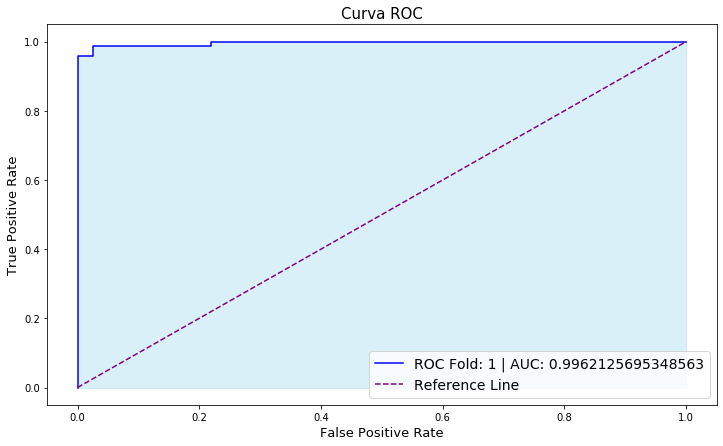

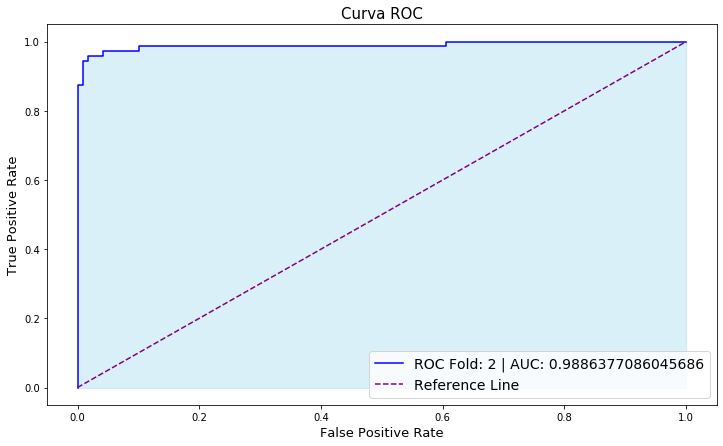

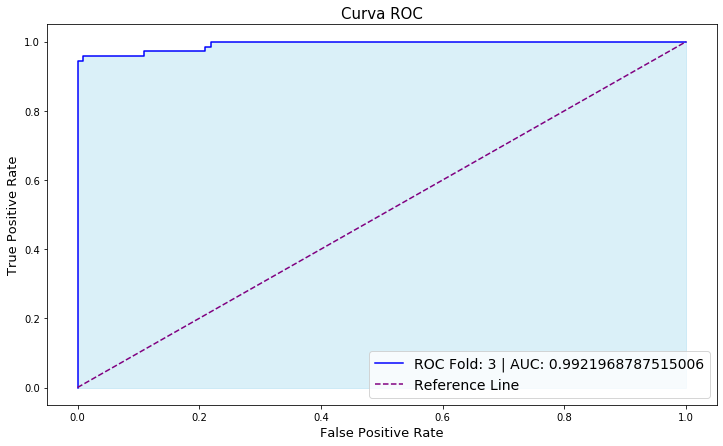


AUC final: 99.235%


In [39]:
sk = StratifiedKFold(n_splits=3 , shuffle=True, random_state=14)

resultados = []
fold = 0


for treino, teste in sk.split(X,y):
    fold = fold + 1 
    X_treino, X_teste = X[treino], X[teste]
    y_treino, y_teste = y[treino], y[teste]
    
    mdl = LogisticRegression(random_state=14, class_weight='balanced')
    mdl.fit(X_treino, y_treino)
    y_proba = mdl.predict_proba(X_teste)[:,1]
    
    

    # Curva ROC 
    fpr, tpr, _ = roc_curve(y_teste, y_proba)
    plt.figure(figsize=(12,7))
    plt.plot(fpr, tpr, color='blue', label='ROC Fold: {} | AUC: {}'.format(fold, roc_auc_score(y_teste, y_proba)))
    plt.fill_between(fpr,tpr, color='skyblue', alpha=0.3)
    plt.plot([0,1], [0,1], color='purple', ls='--', label='Reference Line')
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.title('Curva ROC', fontsize=15)
    plt.legend(loc=4, fontsize=14)
    plt.grid(False)
    plt.show()
    

    # Precision
    metric = roc_auc_score(y_teste, y_proba)
    resultados.append(metric)
    print()

    
print('AUC final: {}%'.format(np.mean(resultados).round(5)*100))

<br>
<hr>
<br>
<hr>
<br>
<hr>

### Curva ROC | Folds 

Curva ROC contendo todos os Folds no mesmo plot 

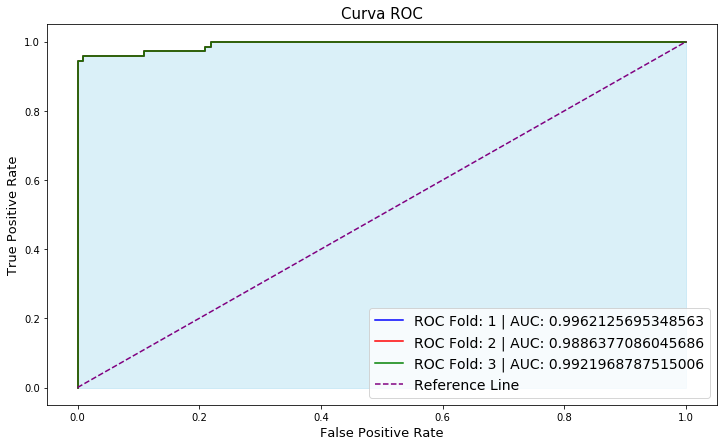


AUC: 99.235%


In [40]:
splits = [1,2,3]

fpr, tpr, _ = roc_curve(y_teste, y_proba)
plt.figure(figsize=(12,7))
plt.plot(fpr, tpr, color='blue', label='ROC Fold: {} | AUC: {}'.format(splits[0], resultados[0]))
plt.plot(fpr, tpr, color='red', label='ROC Fold: {} | AUC: {}'.format(splits[1], resultados[1]))
plt.plot(fpr, tpr, color='green', label='ROC Fold: {} | AUC: {}'.format(splits[2], resultados[2]))
plt.fill_between(fpr,tpr, color='skyblue', alpha=0.3)
plt.plot([0,1], [0,1], color='purple', ls='--', label='Reference Line')
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('Curva ROC', fontsize=15)
plt.legend(loc=4, fontsize=14)
plt.grid(False)
plt.show()

# Validação 
print()
print('AUC: {}%'.format(np.mean(resultados).round(5)*100))

<hr>
<hr>
<hr>